# Hike Planning


In [393]:
import numpy as np

def simple_problem():
    times = # ...
    total_time = # ...
    
    return times, total_time

def hard_problem():
    times = # ...
    total_time = # ...
    
    return times, total_time

In [394]:
times, total_time = simple_problem()

## A. Constructing the Ising Hamiltonian

Math! No tips here.

## B. Finding the minimum

### Evaluating the cost function

First, construct the QAOA ansatz and then write a function to evaluate the energy. Given a quantum circuit, you can evaluate the expectation value as

In [409]:
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.opflow import PauliSumOp

example_op = PauliSumOp.from_list([("ZZ", 1), ("ZI", -1)])
example_circuit = QuantumCircuit(2)
example_circuit.rxx(0.5, 0, 1)

expectation = Statevector(example_circuit).expectation_value(example_op.primitive)

In [412]:
def energy(values):
    return # ...

### Optimize the energy

Now optimize the energy. You could for instance use one of Qiskit's built-in optimizers as

In [413]:
from qiskit.algorithms.optimizers import COBYLA

def example_function(x):
    return (np.linalg.norm(x) - 1) ** 2

example_x0 = np.array([1, 1])  # initial point

example_result = COBYLA().minimize(example_function, example_x0)

print("Minimum at:", example_result.x)
print("Function value:", example_result.fun)

Minimum at: [0.9826468  0.18479216]
Function value: 1.6530767025061928e-08


**Expected result** The optimal solutions should be at least among the 5 most likely states and have a probability distinctively larger than $1 / 2^\text{n}$, where $n$ is the number of qubits.

### Warmstarting

### CVaR expectation

Update your energy evaluation such that only the best $\alpha \in (0, 1]$ fraction of the shots contribute to the expectation value.

## C. Circuit optimization

Now we'll transpile the circuit for the ``ibmq_quito`` device.

In [3]:
from qiskit.test.mock import FakeQuito
backend = FakeQuito()

# or for the actual device, if you have an IBM Quantum Experience account
# from qiskit import IBMQ
# IBMQ.load_account()
# provider = IBMQ.get_provider(group="open")
# backend = provider.get_backend("ibmq_quito")

### Pulse efficient decomposition

*Note: This works correctly only for a circuit with bound parameters.*

You can draw a pulse schedule as follows.

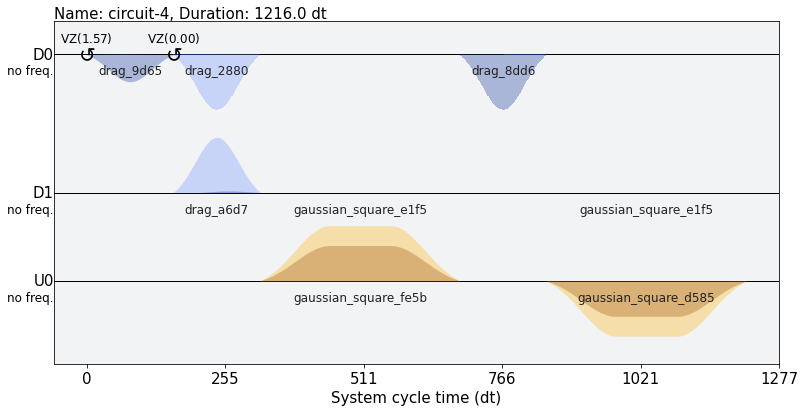

In [4]:
from qiskit import transpile, schedule, QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)

transpiled = transpile(circuit, backend)

schedule(transpiled, backend).draw()